In [6]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

!pip install pywaffle
from pywaffle import Waffle

py.init_notebook_mode(connected=True)
import folium 
from folium import plugins
plt.style.use("fivethirtyeight")# for pretty graphs

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5
#plt.rcParams['image.cmap'] = 'viridis'

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [91]:
df= pd.read_csv('C:\\Users\\Ramya\\Desktop\\covid dataset\\parul covid\\covid_19_india (1).csv',na_values=["-","--"])
df_india = df.copy()

# Coordinates of India States and Uts
India_coord = pd.read_csv('C:\\Users\\Ramya\\Desktop\\covid dataset\\parul covid\\corona\\Indian Coordinates.csv')

#Day by day data of India, Korea and Italy
dbd_India = pd.read_excel('C:\\Users\\Ramya\\Desktop\\covid dataset\\parul covid\\corona\\per_day_cases.xlsx',sheet_name='India')
dbd_Italy = pd.read_excel('C:\\Users\\Ramya\\Desktop\\covid dataset\\parul covid\\corona\\per_day_cases.xlsx',sheet_name='Italy')
dbd_Korea = pd.read_excel('C:\\Users\\Ramya\\Desktop\\covid dataset\\parul covid\\corona\\per_day_cases.xlsx',sheet_name="Korea")

In [38]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1.0,0.0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1.0,0.0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2.0,0.0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3.0,0.0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3.0,0.0,0,0,3


In [39]:
df.dtypes

Sno                           int64
Date                         object
Time                         object
State/UnionTerritory         object
ConfirmedIndianNational     float64
ConfirmedForeignNational    float64
Cured                         int64
Deaths                        int64
Confirmed                     int64
dtype: object

In [45]:

df['Total cases'] = df['ConfirmedIndianNational'] + df['ConfirmedForeignNational']

df['Active cases'] = df['Total cases'] - (df['Cured'] + df['Deaths'])
print(f'Total number of Confirmed COVID 2019 cases across India:', df['Total cases'].sum())
print(f'Total number of Active COVID 2019 cases across India:', df['Active cases'].sum())
print(f'Total number of Cured/Discharged/Migrated COVID 2019 cases across India:', df['Cured'].sum())
print(f'Total number of Deaths due to COVID 2019  across India:', df['Deaths'].sum())
print(f'Total number of States/UTs affected:', len(df['State/UnionTerritory']))

Total number of Confirmed COVID 2019 cases across India: 6103.0
Total number of Active COVID 2019 cases across India: 5508.0
Total number of Cured/Discharged/Migrated COVID 2019 cases across India: 4479
Total number of Deaths due to COVID 2019  across India: 1514
Total number of States/UTs affected: 863


In [46]:
#https://www.kaggle.com/nxrprime/styling-data-frames-covid-19-vs-conferences
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: pink' if v else '' for v in is_max]



#df.style.apply(highlight_max,subset=['Total Confirmed cases (Indian National)', 'Total Confirmed cases ( Foreign National )'])
df.style.apply(highlight_max,subset=['Cured', 'Deaths','Total cases','Active cases'])

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total cases,Active cases
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1,1,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1,1,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2,2,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3,3,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3,3,3
5,6,04/02/20,6:00 PM,Kerala,3,0,0,0,3,3,3
6,7,05/02/20,6:00 PM,Kerala,3,0,0,0,3,3,3
7,8,06/02/20,6:00 PM,Kerala,3,0,0,0,3,3,3
8,9,07/02/20,6:00 PM,Kerala,3,0,0,0,3,3,3
9,10,08/02/20,6:00 PM,Kerala,3,0,0,0,3,3,3


In [49]:
colors = ['#1f77b4', '#17becf']
indian = df['ConfirmedIndianNational'].sum()
foreign = df['ConfirmedForeignNational'].sum()
fig = go.Figure(data=[go.Pie(labels=['Indian','Foreign Nationals'],
                             values= [indian,foreign],hole =.3)])
                          

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#FFFFFF', width=2)))
fig.show()

In [50]:
x = df.groupby('State/UnionTerritory')['Active cases'].sum().sort_values(ascending=False).to_frame()
x.style.background_gradient(cmap='Reds')

,Active cases
State/UnionTerritory,
Maharashtra,1079
Kerala,1061
Rajasthan,388
Karnataka,365
Uttar Pradesh,356
Telengana,329
Haryana,321
Delhi,286
Gujarat,248


In [55]:
fig = px.bar(df.sort_values('Active cases',ascending=False).sort_values('Active cases', ascending=True), 
             x="Active cases", y="State/UnionTerritory", 
             title='Total Active Cases', 
             text='Active cases', 
             orientation='h', 
             width=1000, height=700, range_x = [0, max(df['Active cases'])])
fig.update_traces(marker_color='#46cdcf', opacity=0.8, textposition='inside')

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

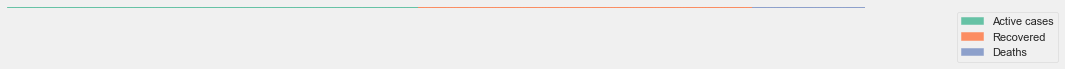

In [65]:
df_condensed = pd.DataFrame([df['Active cases'].sum(),df['Cured'].sum(),df['Deaths'].sum()],columns=['Cases'])
df_condensed.index=['Active cases','Recovered','Deaths']
df_condensed


fig = plt.figure(
    FigureClass=Waffle, 
    rows=5,
    values=df_condensed['Cases'],
    labels=list(df_condensed.index),
    figsize=(15,30),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1,1)}
)

In [63]:
df.dtypes

Sno                           int64
Date                         object
Time                         object
State/UnionTerritory         object
ConfirmedIndianNational     float64
ConfirmedForeignNational    float64
Cured                         int64
Deaths                        int64
Confirmed                     int64
Total cases                 float64
Active cases                float64
dtype: object

In [66]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("National Cases","Foreign Cases"))

temp = df.sort_values('ConfirmedIndianNational', ascending=False).sort_values('ConfirmedIndianNational', ascending=False)

fig.add_trace(go.Bar( y=temp['ConfirmedIndianNational'], x=temp["State/UnionTerritory"],  
                     marker=dict(color=temp['ConfirmedIndianNational'], coloraxis="coloraxis")),
              1, 1)
                     
temp1 = df.sort_values('ConfirmedForeignNational', ascending=False).sort_values('ConfirmedForeignNational', ascending=False)

fig.add_trace(go.Bar( y=temp1['ConfirmedForeignNational'], x=temp1["State/UnionTerritory"],  
                     marker=dict(color=temp1['ConfirmedForeignNational'], coloraxis="coloraxis")),
              1, 2)                     
                     

fig.update_layout(coloraxis=dict(colorscale='rdbu'), showlegend=False,title_text="National vs Foreign Cases",plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [82]:
df_full = pd.merge(India_coord,df,on='State/UnionTerritory')

In [83]:
India_coord['State/UnionTerritory']=India_coord['Name of State / UT']

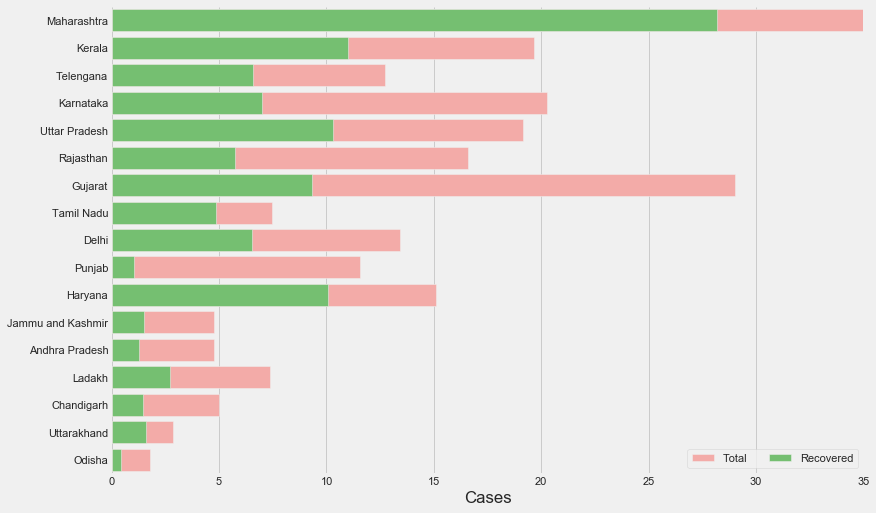

In [87]:
f, ax = plt.subplots(figsize=(12, 8))

data = df_full[['State/UnionTerritory','Total cases','Cured','Deaths']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="State/UnionTerritory", data=data,
            label="Total", color="r",ci=None)

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data,
            label="Recovered", color="g",ci=None)


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",
       xlabel="Cases")
sns.despine(left=True, bottom=True)

In [92]:
dbd_India.head()

,Date,Total Cases,New Cases,Active,Recovered,Deaths,Days after surpassing 100 cases
0,2020-01-30,1,1,1,0,0,NaN
1,2020-01-31,1,0,1,0,0,NaN
2,2020-02-01,1,0,1,0,0,NaN
3,2020-02-02,2,1,2,0,0,NaN
4,2020-02-03,3,1,3,0,0,NaN


In [93]:
# Rise in COVID-19 cases in India
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    mode='lines+markers',name='Total Cases'))

fig.add_trace(go.Scatter(x=dbd_India['Date'], y=dbd_India['Recovered'], 
                mode='lines',name='Recovered'))
fig.add_trace(go.Scatter(x=dbd_India['Date'], y=dbd_India['Active'], 
                mode='lines',name='Active'))
fig.add_trace(go.Scatter(x=dbd_India['Date'], y=dbd_India['Deaths'], 
                mode='lines',name='Deaths'))
        
    
fig.update_layout(title_text='Trend of Coronavirus Cases in India(Cumulative cases)',plot_bgcolor='rgb(250, 242, 242)')

fig.show()


# New COVID-19 cases reported daily in India

import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="New Cases", barmode='group',
             height=400)
fig.update_layout(title_text='New Coronavirus Cases in India per day',plot_bgcolor='rgb(250, 242, 242)')

fig.show()

In [94]:
fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Korea', color_discrete_sequence = px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

fig = px.bar(dbd_India, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.mygbm)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [95]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","Italy", "India"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),
              1, 1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),
              1, 2)

fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),
              2, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [96]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","Italy", "India"))

fig.add_trace(go.Scatter(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),
              1, 1)

fig.add_trace(go.Scatter(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),
              1, 2)

fig.add_trace(go.Scatter(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),
              2, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Trend of Coronavirus cases")

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()

In [97]:
import plotly.graph_objects as go
import numpy as np

title = 'Main Source for News'
labels = ['S.Korea', 'Italy', 'India']
colors = ['rgb(0,128,0)', 'rgb(255,0,0)', 'rgb(49,130,189)']

mode_size = [8, 8, 12]
line_size = [2, 2, 4]

fig = go.Figure()


fig.add_trace(go.Scatter(x=dbd_Korea['Days after surpassing 100 cases'], 
                 y=dbd_Korea['Total Cases'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),            
                 connectgaps=True,
    ))
fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'], 
                 y=dbd_Italy['Total Cases'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True,
    ))

fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'], 
                 y=dbd_India['Total Cases'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[1]),            
                 connectgaps=True,
    ))
    
    
    
annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Days after surpassing 100 cases ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')

fig.show()